In [1]:
import sys
from pathlib import Path

ROOT = Path().resolve().parent.parent
sys.path.append(str(ROOT))

In [ ]:
from src.preprocess.pipeline.handler import PipelineHandler
handler = PipelineHandler(data_folder = ROOT / 'data')

## 1. Preprocess ground truth images
Download decals file from https://zenodo.org/records/10845026/files/Galaxy10_DECals.h5

In [ ]:
decals_file = ROOT / 'data' / "Galaxy10_DECals.h5"
eso_names_file = ROOT / 'data' / 'eso_images_names.csv'

handler.get_gt_images(decals_file=decals_file, eso_names_file=eso_names_file)

Extracting ESO images...
Downloaded 2 ESO images to /Users/luisvalenzuela/Documents/Programs/Memoria/data2/raw/eso
Reference images extraction completed.


In [8]:
handler.set_fits_images()

Creating directory: /Users/luisvalenzuela/Documents/Programs/Memoria/data2/processed
Formatting FITS images of folder: /Users/luisvalenzuela/Documents/Programs/Memoria/data2/raw/eso


## 2. Simulate observations

data_update using version casarundata-2025.08.07-1.tar.gz, acquiring the lock ... 


lock file is not empty : /Users/luisvalenzuela/.casa/data/data_update.lock
data_update: the lock file at /Users/luisvalenzuela/.casa/data is not empty.
A previous attempt to update path may have failed or exited prematurely.
Remove the lock file and set force to True with the desired version (default to most recent).
It may be best to completely re-populate path using pull_data and measures_update.
2025-08-28 18:31:49	SEVERE	::casa	lock file is not empty : /Users/luisvalenzuela/.casa/data/data_update.lock
2025-08-28 18:31:49	SEVERE	::casa	data_update: the lock file at /Users/luisvalenzuela/.casa/data is not empty.
2025-08-28 18:31:49	SEVERE	::casa	A previous attempt to update path may have failed or exited prematurely.
2025-08-28 18:31:49	SEVERE	::casa	Remove the lock file and set force to True with the desired version (default to most recent).
2025-08-28 18:31:49	SEVERE	::casa	It may be best to completely re-populate path using pull_data and measures_update.
2025-08-28 18:31:49	SEVERE

Found 3 processed images for simulation.


2025-08-28 18:31:51	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out23.noisy.T.cal_sim_temp (Tf Jones):
2025-08-28 18:31:51	WARN	noise::CTPatchedInterp::interpolate+	 Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
2025-08-28 18:31:51	WARN	noise::CTPatchedInterp::interpolate+	 of calibration for MS spw=0; using NEAREST instead.
2025-08-28 18:31:52	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out21.noisy.T.cal_sim_temp (Tf Jones):
2025-08-28 18:31:52	WARN	noise::CTPatchedInterp::interpolate+	 Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
2025-08-28 18:31:52	WARN	noise::CTPatchedInterp::interpolate+	 of calibration for MS spw=0; using NEAREST instead.
2025-08-28 18:31:53	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out20.noisy.T.cal_sim_temp (Tf Jones):
2025-08-28 18:31:53	WARN	noise::CTPatchedInterp::interpolate+	 Insu

Simulation of observations completed.


2025-08-28 18:32:01	WARN	noise::CTPatchedInterp::interpolate	In caltable groundtruth.alma.out20.noisy.T.cal_sim_temp (Tf Jones):
2025-08-28 18:32:01	WARN	noise::CTPatchedInterp::interpolate+	 Insufficient solution channel sampling (nchan=1) for frequency-dependent LINEAR interpolation 
2025-08-28 18:32:01	WARN	noise::CTPatchedInterp::interpolate+	 of calibration for MS spw=0; using NEAREST instead.


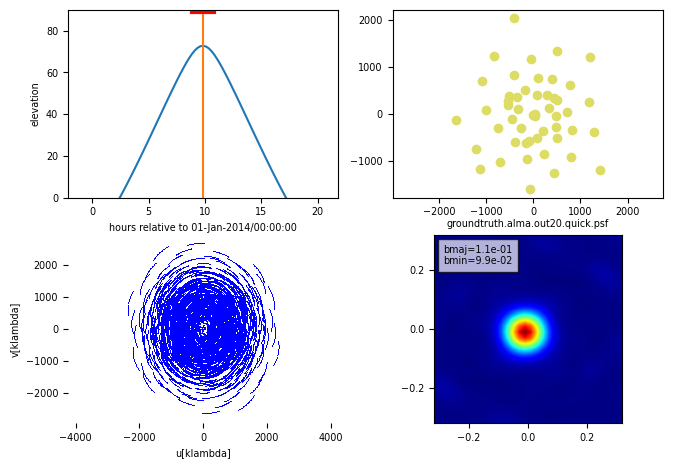

In [3]:
sim_conditions = [
    {  
        'antenna' : 'alma.out23.cfg',
        'totaltime' : 30000, # in seconds
        'noise': 5,  # in Jy
        'arcsec': 0.02,  # in arcseconds
        'indirection': 'J2000 12h00m00 -23d00m00'
    },
    {
        'antenna' : 'alma.out21.cfg',
        'totaltime' : 14400, # in seconds
        'noise': 10, # in Jy
        'arcsec': 0.02, # in arcseconds
        'indirection': 'J2000 12h00m00 -30d00m00'
    },
    {
        'antenna' : 'alma.out20.cfg',
        'totaltime' : 7200, # in seconds
        'noise': 20,  # in Jy
        'arcsec': 0.02,  # in arcseconds
        'indirection': 'J2000 12h00m00 -40d00m00'
    }
]

handler.simulate_observations(sim_conditions = sim_conditions)

## 3. Reconstruct simulated observations

In [3]:
rec_conditions = {
    'hogbom_config' : {
        'imsize': 256,
        'cell': '0.02arcsec',
        'niter': 50000,
        'weighting': 'natural',
        'deconvolver': 'hogbom',
    },

    'multiscale_config': {
        'imsize': 256,
        'cell': '0.02arcsec',
        'niter': 10000,
        'weighting': 'natural',
        'scales': [0, 4, 12, 32],
        'deconvolver': 'multiscale',
    },

    'mem_config': {
        'imsize': 256,
        'cell': '0.02arcsec',
        'niter': 200,
        'weighting': 'natural',
        'deconvolver': 'mem',
    }
}

handler.reconstruct_images(rec_conditions = rec_conditions)

data_update using version casarundata-2025.08.07-1.tar.gz, acquiring the lock ... 


lock file is not empty : /Users/luisvalenzuela/.casa/data/data_update.lock
data_update: the lock file at /Users/luisvalenzuela/.casa/data is not empty.
A previous attempt to update path may have failed or exited prematurely.
Remove the lock file and set force to True with the desired version (default to most recent).
It may be best to completely re-populate path using pull_data and measures_update.
2025-08-29 02:24:09	SEVERE	::casa	lock file is not empty : /Users/luisvalenzuela/.casa/data/data_update.lock
2025-08-29 02:24:09	SEVERE	::casa	data_update: the lock file at /Users/luisvalenzuela/.casa/data is not empty.
2025-08-29 02:24:09	SEVERE	::casa	A previous attempt to update path may have failed or exited prematurely.
2025-08-29 02:24:09	SEVERE	::casa	Remove the lock file and set force to True with the desired version (default to most recent).
2025-08-29 02:24:09	SEVERE	::casa	It may be best to completely re-populate path using pull_data and measures_update.
2025-08-29 02:24:09	SEVERE

Found 3 processed images for reconstruction.
Imaging completed.


2025-08-29 02:24:17	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:24:19	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging


Imaging completed.
Peak Res at start of step : 6.45794
Flux at start of step : 0
MAX RES at end : 3.69725
peakres : 3.69725    model : 556.913
Peak Res at start of step : 3.92444
Flux at start of step : 556.913
MAX RES at end : 1.76926
peakres : 1.94239    model : 1028.22
Peak Res at start of step : 2.13344
Flux at start of step : 1028.22
MAX RES at end : 0.779182
peakres : 1.37239    model : 1807.15
Peak Res at start of step : 1.18512
Flux at start of step : 1807.15
MAX RES at end : 0.604939
peakres : 0.74071    model : 2576.66
Peak Res at start of step : 0.901481
Flux at start of step : 2576.66
MAX RES at end : 0.242374
peakres : 0.69666    model : 2660.32
Peak Res at start of step : 0.870997
Flux at start of step : 2660.32
MAX RES at end : 0.214355
peakres : 0.675812    model : 2678
Peak Res at start of step : 0.865617
Flux at start of step : 2678
MAX RES at end : 0.212883
peakres : 0.670891    model : 2682.88
Peak Res at start of step : 0.864121
Flux at start of step : 2682.88
MAX 

2025-08-29 02:25:26	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:25:29	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:25:32	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging


Imaging completed.
Peak Res at start of step : 9.91701
Flux at start of step : 0
MAX RES at end : 4.06509
peakres : 8.81033    model : 1418.67
Peak Res at start of step : 2.09263
Flux at start of step : 1418.67
MAX RES at end : 1.46101
peakres : 3.91229    model : 2340.76
Imaging completed.
Imaging completed.


2025-08-29 02:26:20	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:26:23	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:26:24	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:26:26	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml

Imaging completed.
Peak Res at start of step : 18.3462
Flux at start of step : 0
MAX RES at end : 10.4172
peakres : 36.9132    model : 4685.2
Imaging completed.
Imaging completed.


2025-08-29 02:27:11	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:27:13	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:27:16	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:27:18	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml

Imaging completed.
Peak Res at start of step : 11.2278
Flux at start of step : 0
MAX RES at end : 16.7693
peakres : 16.7693    model : 1
Peak Res at start of step : 11.2277
Flux at start of step : 1
MAX RES at end : 16.7692
peakres : 16.7692    model : 2
Peak Res at start of step : 11.2276
Flux at start of step : 2
MAX RES at end : 16.769
peakres : 16.769    model : 3
Peak Res at start of step : 11.2275
Flux at start of step : 3
MAX RES at end : 16.7689
peakres : 16.7689    model : 4
Peak Res at start of step : 11.2274
Flux at start of step : 4
MAX RES at end : 16.7687
peakres : 16.7687    model : 5
Peak Res at start of step : 11.2273
Flux at start of step : 5
MAX RES at end : 16.7686
peakres : 16.7686    model : 6
Peak Res at start of step : 11.2272
Flux at start of step : 6
MAX RES at end : 16.7684
peakres : 16.7684    model : 7
Peak Res at start of step : 11.2271
Flux at start of step : 7
MAX RES at end : 16.7682
peakres : 16.7682    model : 8
Peak Res at start of step : 11.227
Flux

2025-08-29 02:28:31	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:28:33	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:28:35	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:28:37	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml

Imaging completed.
Peak Res at start of step : 18.0622
Flux at start of step : 0
MAX RES at end : 9.23805
peakres : 18.4826    model : 866.059
Peak Res at start of step : 4.69285
Flux at start of step : 866.059
MAX RES at end : 2.19832
peakres : 4.52567    model : 3769.17
Peak Res at start of step : 2.12279
Flux at start of step : 3769.17
MAX RES at end : 0.911046
peakres : 2.38974    model : 4681.17
Peak Res at start of step : 1.70618
Flux at start of step : 4681.17
MAX RES at end : 0.84772
peakres : 2.2596    model : 4773.79
Imaging completed.
Imaging completed.


2025-08-29 02:29:31	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:29:33	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:29:35	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:29:36	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml

Imaging completed.
Peak Res at start of step : 25.608
Flux at start of step : 0
MAX RES at end : 1749.7
peakres : 1749.7    model : 0.976344
Imaging completed.
Imaging completed.


2025-08-29 02:30:20	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:30:23	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:30:25	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:30:29	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml

Imaging completed.
Peak Res at start of step : 8.9555
Flux at start of step : 0
MAX RES at end : 10.4411
peakres : 10.4411    model : 1
Peak Res at start of step : 8.95536
Flux at start of step : 1
MAX RES at end : 10.4408
peakres : 10.4408    model : 2
Peak Res at start of step : 8.95522
Flux at start of step : 2
MAX RES at end : 10.4405
peakres : 10.4405    model : 3
Peak Res at start of step : 8.95508
Flux at start of step : 3
MAX RES at end : 10.4401
peakres : 10.4401    model : 4
Peak Res at start of step : 8.95494
Flux at start of step : 4
MAX RES at end : 10.4398
peakres : 10.4398    model : 5
Peak Res at start of step : 8.95479
Flux at start of step : 5
MAX RES at end : 10.4395
peakres : 10.4395    model : 6
Peak Res at start of step : 8.95465
Flux at start of step : 6
MAX RES at end : 10.4391
peakres : 10.4391    model : 7
Peak Res at start of step : 8.95451
Flux at start of step : 7
MAX RES at end : 10.4388
peakres : 10.4388    model : 8
Peak Res at start of step : 8.95437
Fl

2025-08-29 02:31:44	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:31:46	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging


Imaging completed.
Peak Res at start of step : 13.1128
Flux at start of step : 0
MAX RES at end : 9.66684
peakres : 25.1902    model : 1953.08
Peak Res at start of step : 3.91802
Flux at start of step : 1953.08
MAX RES at end : 2.36817
peakres : 3.21594    model : 4060.03
Peak Res at start of step : 2.1672
Flux at start of step : 4060.03
MAX RES at end : 1.02857
peakres : 1.73218    model : 4764.52
Peak Res at start of step : 1.10679
Flux at start of step : 4764.52
MAX RES at end : 1.86037
peakres : 4.10454    model : 4772.32
Imaging completed.
Imaging completed.


2025-08-29 02:32:42	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:32:44	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:32:45	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml-data/build-dir/CASASPECS-RELEASE670BUILDCASALITH0-BPO14ARMPY311/casa6/casatools/src/code/synthesis/ImagerObjects/SDAlgorithmMSClean.cc, line 185)	MSClean minor cycle stopped at large scale negative or diverging
2025-08-29 02:32:46	WARN	SDAlgorithmMSClean::takeOneStep (file /Users/casaci/bamboohome/xml

Imaging completed.
Peak Res at start of step : 17.768
Flux at start of step : 0
MAX RES at end : 32.5409
peakres : 43.3113    model : 2588.72
Imaging completed.


In [7]:
handler.generate_data_description()

Data description saved to /Users/luisvalenzuela/Documents/Programs/Memoria/data/rec_data_description.csv
